In [31]:
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import scipy as sp

In [32]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !git clone https://github.com/rkbono/GLY4451.git
    !pip install cartopy
    fpath = './GLY4451/'
else:
    print('Not running on CoLab')
    fpath = './'

Not running on CoLab


# Agenda
1. Intro to grids and np.meshgrid
1. Contour plots
1. Linear regresion (by hand)
1. Linear regression (with scipy)
1. Quick monte carlo
1. Quick bootstrap
1. Cluster analysis
1. Inverting the Rosenbrock function

# Grids and np.meshgrid

In [33]:
xv = np.arange(0,10,1)
yv = np.arange(10,20,1)

xm,ym = np.meshgrid(xv,yv)
xms,yms = np.meshgrid(xv,yv,sparse=True)

In [34]:
def halfspace_temp(z,t,ta,ka):
    
    return ta*sp.special.erf(z/(2*np.sqrt(ka*t)))

fMyr = lambda t: dt.timedelta(weeks=52).total_seconds()*1e6*t

In [38]:
tmyr = np.arange(0,100.1,1)

mt,md = np.meshgrid(fMyr(tmyr),np.arange(0,150e3,1e3))

tzt = halfspace_temp(md,mt,1300,1e-6)

/var/folders/1s/wjx12t_j5h7gnb2g26c4dv8h0000gn/T/ipykernel_21080/473443969.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return ta*sp.special.erf(z/(2*np.sqrt(ka*t)))
/var/folders/1s/wjx12t_j5h7gnb2g26c4dv8h0000gn/T/ipykernel_21080/473443969.py:3: RuntimeWarning: invalid value encountered in true_divide
  return ta*sp.special.erf(z/(2*np.sqrt(ka*t)))


In [39]:
mt

array([[0.0000000e+00, 3.1449600e+13, 6.2899200e+13, ..., 3.0820608e+15,
        3.1135104e+15, 3.1449600e+15],
       [0.0000000e+00, 3.1449600e+13, 6.2899200e+13, ..., 3.0820608e+15,
        3.1135104e+15, 3.1449600e+15],
       [0.0000000e+00, 3.1449600e+13, 6.2899200e+13, ..., 3.0820608e+15,
        3.1135104e+15, 3.1449600e+15],
       ...,
       [0.0000000e+00, 3.1449600e+13, 6.2899200e+13, ..., 3.0820608e+15,
        3.1135104e+15, 3.1449600e+15],
       [0.0000000e+00, 3.1449600e+13, 6.2899200e+13, ..., 3.0820608e+15,
        3.1135104e+15, 3.1449600e+15],
       [0.0000000e+00, 3.1449600e+13, 6.2899200e+13, ..., 3.0820608e+15,
        3.1135104e+15, 3.1449600e+15]])

In [40]:
md

array([[     0.,      0.,      0., ...,      0.,      0.,      0.],
       [  1000.,   1000.,   1000., ...,   1000.,   1000.,   1000.],
       [  2000.,   2000.,   2000., ...,   2000.,   2000.,   2000.],
       ...,
       [147000., 147000., 147000., ..., 147000., 147000., 147000.],
       [148000., 148000., 148000., ..., 148000., 148000., 148000.],
       [149000., 149000., 149000., ..., 149000., 149000., 149000.]])

In [41]:
tzt

array([[          nan,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [1300.        ,  130.4401542 ,   92.35720378, ...,   13.21101156,
          13.14412352,   13.07824128],
       [1300.        ,  258.82561252,  183.9836319 , ...,   26.41988012,
          26.28613643,   26.15440351],
       ...,
       [1300.        , 1300.        , 1300.        , ..., 1220.49023697,
        1218.77105811, 1217.04779077],
       [1300.        , 1300.        , 1300.        , ..., 1222.75245604,
        1221.06230318, 1219.36772545],
       [1300.        , 1300.        , 1300.        , ..., 1224.96100702,
        1223.2997341 , 1221.63371064]])

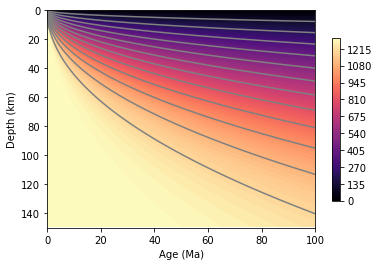

In [52]:
fig = plt.figure()
ax = fig.subplots(1,1)

hh = ax.contourf(mt/fMyr(1),md/1e3,tzt,cmap=plt.cm.magma,levels=100)
ax.contour(mt/fMyr(1),md/1e3,tzt,levels=np.arange(0,1300.1,100),colors='grey')
ax.set_ylim([150,0])
ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Depth (km)')

fig.colorbar(hh,ax=ax,shrink=0.75)